In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
import torchvision
from torchvision import transforms, datasets
import skimage

In [4]:
print(torch.__version__)
print(torchvision.__version__)
print(skimage.__version__)

1.4.0
0.5.0
0.15.0


In [34]:
norm_mean = (0.4914, 0.4822, 0.4465)
norm_std = (0.2023, 0.1994, 0.2010)

batch_size = 32
validation_batch_size = 32

data_dir = 'D:/AI_Hackatlon/AI Vision Challenge Dataset/hackathon_dataset'

transform_train = transforms.Compose([transforms.ToTensor()] )
dataset = torchvision.datasets.ImageFolder(root= data_dir, transform = transform_train)

In [55]:
armut = "D:/AI_Hackatlon/AI Vision Challenge Dataset/hackathon_dataset/Armut"

In [64]:
def show_image(image, title='Image'):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [68]:
import skimage.io

# read image
image = skimage.io.imread(fname="armut_2.jpg")
image2 = skimage.io.imread(fname="armut_0.jpg")
image3 = skimage.io.imread(fname="armut_3.jpg")

In [58]:
import skimage.viewer

# display image
viewer = skimage.viewer.ImageViewer(image)
viewer.show()

C:\Users\TCSDESTICIOGLU\AppData\Local\Continuum\anaconda4\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


[]

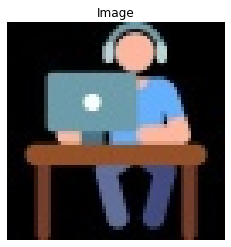

In [65]:
show_image(image)

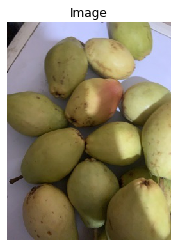

In [66]:
show_image(image2)

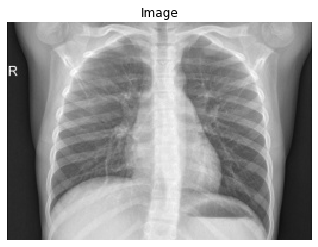

In [69]:
show_image(image3)

<function matplotlib.pyplot.show(*args, **kw)>

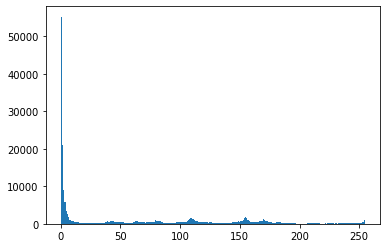

In [71]:
import matplotlib.pyplot as plt
plt.hist(image.flatten(),bins=256)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

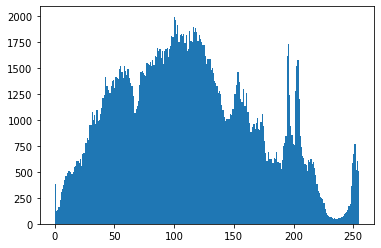

In [62]:

plt.hist(image2.flatten(),bins=256)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

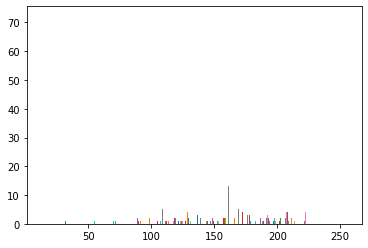

In [73]:
plt.hist(image3[:,:,0],bins=256)
plt.hist(image3[:,:,1],bins=256)
plt.hist(image3[:,:,2],bins=256)
plt.show

In [35]:
classes = os.listdir(data_dir)
print(classes)

['Armut', 'Cilek', 'Elma_Kirmizi', 'Elma_Yesil', 'Mandalina', 'Muz', 'Portakal']


In [36]:
k = 0
for i in classes:
    print('No. of training examples for:',i, len(os.listdir(data_dir + "/"+ i)))
    k += len(os.listdir(data_dir + "/"+ i))
print("No. of training examples TOTAL",k)

No. of training examples for: Armut 2991
No. of training examples for: Cilek 2052
No. of training examples for: Elma_Kirmizi 2409
No. of training examples for: Elma_Yesil 1956
No. of training examples for: Mandalina 2137
No. of training examples for: Muz 2268
No. of training examples for: Portakal 1980
No. of training examples TOTAL 15793


In [37]:
import matplotlib.pyplot as plt

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Armut (0)


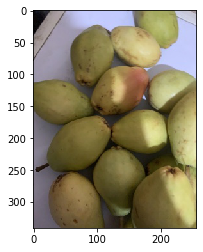

In [38]:
show_example(*dataset[0])

In [39]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, 5).permute(1, 2, 0))
        break

In [40]:
show_batch(train_data_loader)

NameError: name 'train_data_loader' is not defined

In [41]:
# normalization values for pretrained ResNet18 on Imagenet

norm_mean = (0.4914, 0.4822, 0.4465)
norm_std = (0.2023, 0.1994, 0.2010)

batch_size = 32
validation_batch_size = 32



transform_train = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomRotation(degrees=60),
                    transforms.ToTensor(),
                    transforms.Normalize(norm_mean, norm_std),
                    ])

transform_test = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize(norm_mean, norm_std),
                    ])


In [44]:
import torch as th
import math
import numpy as np

test_size = 0.2
val_size = 0.2
class Sampler(object):
    """Base class for all Samplers.
    """

    def __init__(self, data_source):
        pass

    def __iter__(self):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError
        
class StratifiedSampler(Sampler):
    """Stratified Sampling
    Provides equal representation of target classes
    """
    def __init__(self, class_vector,test_size):
        """
        Arguments
        ---------
        class_vector : torch tensor
            a vector of class labels
        batch_size : integer
            batch_size
        """
        self.n_splits = 1
        self.class_vector = class_vector
        self.test_size = test_size

    def gen_sample_array(self):
        try:
            from sklearn.model_selection import StratifiedShuffleSplit
        except:
            print('Need scikit-learn for this functionality')
        import numpy as np
        
        s = StratifiedShuffleSplit(n_splits=self.n_splits, test_size=self.test_size)
        X = th.randn(self.class_vector.size(0),2).numpy()
        y = self.class_vector.numpy()
        s.get_n_splits(X, y)

        train_index, test_index= next(s.split(X, y))
        return train_index, test_index

    def __iter__(self):
        return iter(self.gen_sample_array())

    def __len__(self):
        return len(self.class_vector)
    
data_dir2 = 'D:/AI_Hackatlon/AI Vision Challenge Dataset/hackathon_dataset'
data_dir3 = 'D:/AI_Hackatlon/AI Vision Challenge Dataset/hackathon_dataset'
dataset = torchvision.datasets.ImageFolder(root= data_dir2)
data_label = [s[1] for s in dataset.samples]

ss = StratifiedSampler(torch.FloatTensor(data_label), test_size)
pre_train_indices, test_indices = ss.gen_sample_array()
# The "pre" is necessary to use array to identify train/ val indices with indices generated by second sampler

train_label = np.delete(data_label, test_indices, None)
ss = StratifiedSampler(torch.FloatTensor(train_label), test_size)
train_indices, val_indices = ss.gen_sample_array()
indices = {'train': pre_train_indices[train_indices],  # Indices of second sampler are used on pre_train_indices
           'val': pre_train_indices[val_indices],  # Indices of second sampler are used on pre_train_indices
           'test': test_indices
           }

train_indices = indices['train']
val_indices = indices['val']
test_indices = indices['test']
print("Train Data Size:", len(train_indices))
print("Test Data Size:", len(test_indices))

print("Validation Data Size:", len(val_indices))

Train Data Size: 10106
Test Data Size: 3159
Validation Data Size: 2527


In [45]:
from sklearn.model_selection import train_test_split
data_dir = 'D:/ISIC2/1'
dataset = torchvision.datasets.ImageFolder(root= data_dir, transform=transform_train)

#targets = dataset.targets
#test_idx = list(test_sample.index)
#train_idx, valid_idx= train_test_split(np.arange(len(targets)),test_size=0.2,shuffle=True,stratify=targets)

import itertools
train_idx_ = list(train_indices) 
valid_idx_ = list(val_indices)
test_idx_ = list(test_indices)
#print(len(train_idx))
#print(len(valid_idx))
#print(len(test_idx))
#print(len(train_idx_2000))
#print(len(valid_idx_500))
train_sampler = torch.utils.data.SubsetRandomSampler(train_idx_)
valid_sampler = torch.utils.data.SubsetRandomSampler(valid_idx_)
test_sampler = torch.utils.data.SubsetRandomSampler(test_idx_)

train_data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False,num_workers=8, sampler= train_sampler)

dataset2 = torchvision.datasets.ImageFolder(root= data_dir, transform=transform_test)
validation_data_loader = torch.utils.data.DataLoader(dataset2, batch_size=validation_batch_size, shuffle=False, num_workers=8, sampler= valid_sampler)

dataset3 = torchvision.datasets.ImageFolder(root= data_dir, transform=transform_test)
test_data_loader = torch.utils.data.DataLoader(dataset3, batch_size=validation_batch_size, shuffle=False,num_workers=8,sampler=test_sampler)



data_dirtest = 'D:/AI_Hackatlon/AI Vision Challenge Dataset/hackathon_dataset'
dataset4 = torchvision.datasets.ImageFolder(root= data_dirtest, transform=transform_test)
real_test_data_loader = torch.utils.data.DataLoader(dataset4, batch_size=validation_batch_size, shuffle=False,num_workers=8)

# USING PRE-TRAINED RESNET18

In [46]:
from torch import nn

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_classes = len(classes)
resnet_18 = torchvision.models.resnet50(pretrained = True)

In [47]:
#Freeze model parameters
for param in resnet_18.parameters():
    param.requires_grad = False

# We replace last layer of resnet to match our number of classes which is 7
from collections import OrderedDict
fc = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(2048,7)), ("drop_out",nn.Dropout(p=0.3)) ] ) )

resnet_18.fc = fc

In [48]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_18.parameters(), lr=1e-5)

In [49]:
def get_accuracy(predicted, labels):
    batch_len, correct= 0, 0
    batch_len = labels.size(0)
    correct = (predicted == labels).sum().item()
    return batch_len, correct
def evaluate(model, val_loader):
    losses= 0
    num_samples_total=0
    correct_total=0
    model.eval()
    for inputs, labels in val_loader:
       
        out = model(inputs)
        _, predicted = torch.max(out, 1)
        loss = criterion(out, labels)
        losses += loss.item() 
        b_len, corr = get_accuracy(predicted, labels)
        num_samples_total +=b_len
        correct_total +=corr
    accuracy = correct_total/num_samples_total
    losses = losses/len(val_loader)
    return losses, accuracy


In [52]:
resnet_18 = torch.load("model.pth")

In [53]:
#Train Data Mode, number of loops over the dataset
num_epochs = 2
accuracy = []
val_accuracy = []
losses = []
val_losses = []
n_epochs_stop = 3
min_val_loss = np.Inf
epochs_no_improve = 0

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_total= 0.0
    num_samples_total=0.0
    for i, data in enumerate(train_data_loader):
        # get the inputs
        inputs, labels = data
        
        # set the parameter gradients to zero
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = resnet_18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #compute accuracy
        _, predicted = torch.max(outputs, 1)
        b_len, corr = get_accuracy(predicted, labels)
        num_samples_total +=b_len
        correct_total +=corr
        running_loss += loss.item()
   
    
    
    running_loss /= len(train_data_loader)
    train_accuracy = correct_total/num_samples_total
    val_loss, val_acc = evaluate(resnet_18, validation_data_loader)
    # Average validation loss
    val_loss = val_loss / len(train_data_loader)
    
   
    
    # If the validation loss is at a minimum
    if val_loss < min_val_loss:
    # Save the model
      torch.save(resnet_18, "model.pth")
      epochs_no_improve = 0
      min_val_loss = val_loss
  
    else:
      epochs_no_improve += 1
    # Check early stopping condition
      if epochs_no_improve == n_epochs_stop:
        print('Early stopping!')
    
        # Load in the best model
        resnet_18 = torch.load("model.pth")


    print('Epoch: %d' %(epoch+1))
    print('Loss: %.3f  Accuracy:%.3f' %(running_loss, train_accuracy))
    print('Validation Loss: %.3f  Val Accuracy: %.3f' %(val_loss, val_acc))

    losses.append(running_loss)
    val_losses.append(val_loss)
    accuracy.append(train_accuracy)
    val_accuracy.append(val_acc)
torch.save(resnet_18, "model.pth")

KeyboardInterrupt: 